In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("student_scores.csv")
print(df.head())

   Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0           0  female         NaN   bachelor's degree      standard     none   
1           1  female     group C        some college      standard      NaN   
2           2  female     group B     master's degree      standard     none   
3           3    male     group A  associate's degree  free/reduced     none   
4           4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  W

In [3]:
df.describe() #This function describe the overall information of the dataset

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [4]:
df.info()  #This function describes the over all column name and datatype in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [5]:
df.isnull().sum()  #This function tell the number(count) those value are null in the dataset.

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

# Droping the unnamed colum


In [6]:
df = df.drop("Unnamed: 0" , axis=1)
print(df.head())

   Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0  female         NaN   bachelor's degree      standard     none   
1  female     group C        some college      standard      NaN   
2  female     group B     master's degree      standard     none   
3    male     group A  associate's degree  free/reduced     none   
4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  WritingScore  
0            < 5         71            71            74  


# Gender Distribution

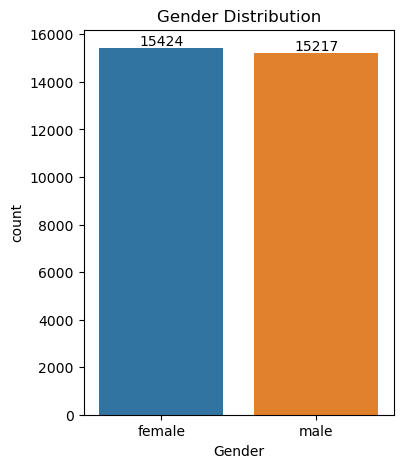

In [7]:
plt.figure(figsize= (4, 5))
ax = sns.countplot(data = df, x = "Gender")
plt.title("Gender Distribution")
ax.bar_label(ax.containers[0])
plt.show()

#From the above chart we can analysed that the number of the females in the data is more than the number of male

In [8]:
gb = df.groupby("ParentEduc").agg({"MathScore" : 'mean', "ReadingScore" : "mean", "WritingScore": "mean"})
print(gb)

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.365586     71.124324     70.299099
bachelor's degree   70.466627     73.062020     73.331069
high school         64.435731     67.213997     65.421136
master's degree     72.336134     75.832921     76.356896
some college        66.390472     69.179708     68.501432
some high school    62.584013     65.510785     63.632409


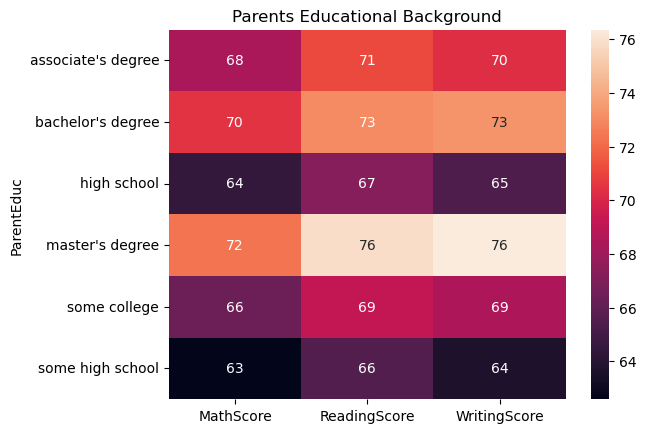

In [9]:
sns.heatmap(gb , annot = True) #this heat map can easly visuavlize the data of the student's parent education 
plt.title("Parents Educational Background")
plt.show() # here annot param will add the valuse in the associated block of colour


In [10]:
#From above heat map we can analyze that the parent's education is also a factor affecting the childrens marks
# as we can see the dark shade is where there parents education background is from high school (Low), where as we 
#we can see that the light shade block denotes the good marks of the childerns who's parents are educated enough!!

In [11]:
gb_mar = df.groupby("ParentMaritalStatus").agg({"MathScore": "mean", "WritingScore": "mean" , "ReadingScore": "mean"})
print(gb_mar)

                     MathScore  WritingScore  ReadingScore
ParentMaritalStatus                                       
divorced             66.691197     68.799146     69.655011
married              66.657326     68.420981     69.389575
single               66.165704     68.174440     69.157250
widowed              67.368866     68.563452     69.651438


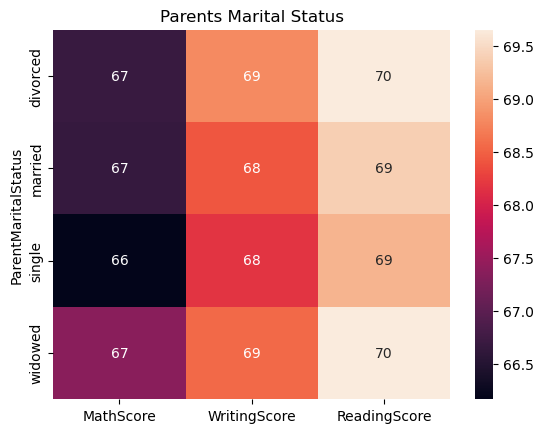

In [12]:
sns.heatmap(gb_mar, annot =True)
plt.title("Parents Marital Status")
plt.show()

In [13]:
# From above chart we can analyse that the Parents Marital status doesn't  affect much on the marks of the students


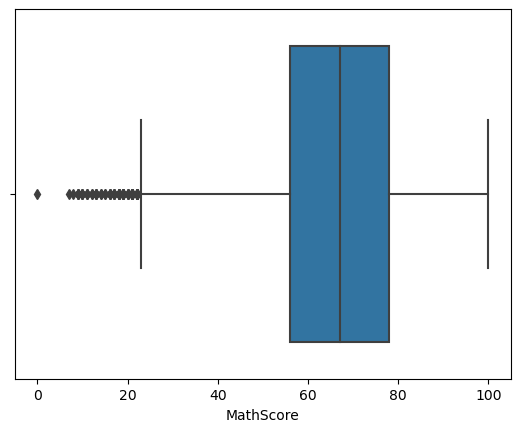

In [14]:
sns.boxplot(data = df , x ="MathScore")# this box plot function shows the outliers value those value that are leying outside
plt.show()

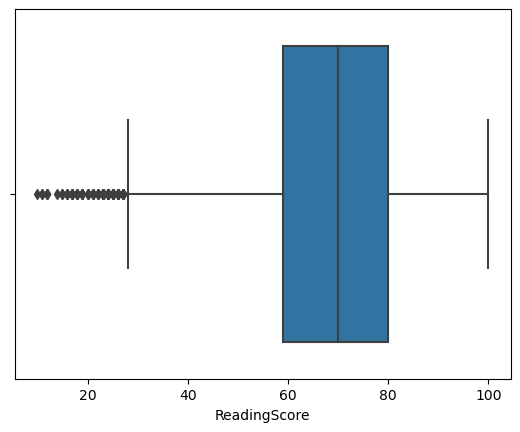

In [16]:
sns.boxplot(data = df , x = "ReadingScore")
plt.show()

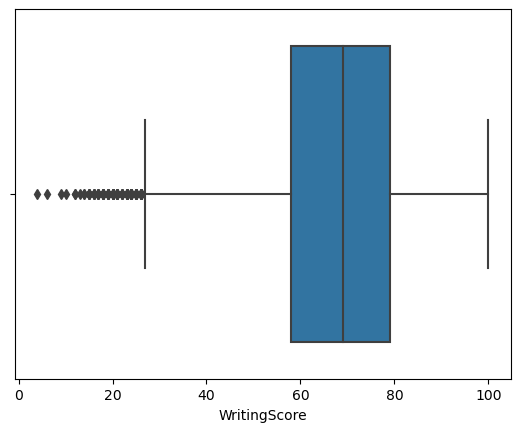

In [17]:
sns.boxplot(data = df , x = "WritingScore")
plt.show()

In [18]:
print(df["EthnicGroup"].unique())

[nan 'group C' 'group B' 'group A' 'group D' 'group E']


# Distribution of EthnicGrop

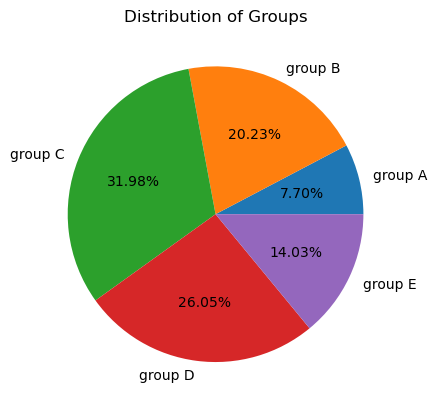

In [28]:
groupA = df.loc[(df['EthnicGroup'] == "group A")].count()
groupB = df.loc[(df['EthnicGroup'] == "group B")].count()
groupC = df.loc[(df['EthnicGroup'] == "group C")].count()
groupD = df.loc[(df['EthnicGroup'] == "group D")].count()
groupE = df.loc[(df['EthnicGroup'] == "group E")].count()
l = ["group A", "group B", "group C", "group D", "group E"]
myList = [groupA["EthnicGroup"],groupB["EthnicGroup"], groupC["EthnicGroup"], groupD["EthnicGroup"], groupE["EthnicGroup"]]
plt.pie(myList, labels=l, autopct="%1.2f%%")
plt.title("Distribution of Groups")
plt.show()
